In [31]:
import pandas as pd
import numpy as np
from __future__ import division
df = pd.read_csv('StarWars_dataset.csv')
df.head(3)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?��,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central


Let's use the Star Wars dataset again. Load it in and pull up the head. 

#### Create a hypothesis involving different subsections of the data. 

For example:
- Are respondents more likely to respond "Han" to the question "Who shot first?" if they also say they are fans of Star Trek?

Type your hypothesis in a markdown cell below:

H0: respondants are not more likely to respond "Han" to the question "Who shot first?" if they are also fans of Star Trek
H1: respondants are more likely to repond "Han" if they are Star Trek fans

Use boolean indexing to create subsets of the data to support your hypothesis. See if you can answer questions using mutiple variables. Remember the skillsets we are primarily looking to develop here are around data cleaning, parsing, slicing, etc

In [10]:
df.columns

Index([u'RespondentID',
       u'Have you seen any of the 6 films in the Star Wars franchise?',
       u'Do you consider yourself to be a fan of the Star Wars film franchise?',
       u'Which of the following Star Wars films have you seen? Please select all that apply.',
       u'Unnamed: 4', u'Unnamed: 5', u'Unnamed: 6', u'Unnamed: 7',
       u'Unnamed: 8',
       u'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       u'Unnamed: 10', u'Unnamed: 11', u'Unnamed: 12', u'Unnamed: 13',
       u'Unnamed: 14',
       u'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       u'Unnamed: 16', u'Unnamed: 17', u'Unnamed: 18', u'Unnamed: 19',
       u'Unnamed: 20', u'Unnamed: 21', u'Unnamed: 22', u'Unnamed: 23',
       u'Unnamed: 24', u'Unnamed: 25', u'Unnamed: 26', u'Unnamed: 27',
       u'Unnamed: 28', u'Which character shot first?',
  

In [84]:
# Creating sub data frame
sdf = df.ix[:,[29,32]]
ans_fans = sdf[sdf.ix[:,1] == "Yes"]
print("There are %d Star Trek fans" % len(ans_fans))
ans_fans_han = ans_fans[ans_fans.ix[:,0] == "Han"]
print("%d of them answered Han, that is %f percent got the answer right" % (len(ans_fans_han),len(ans_fans_han)*100/len(ans_fans)))

ans_non_fans = sdf[sdf.ix[:,1] == "No"]
print("\nThere are %d non Star Trek fans" % len(ans_non_fans))
ans_non_fans_han = ans_non_fans[ans_non_fans.ix[:,0] != "Han"]
print("%d of them answered something different than Han, that is %f percent got the answer right" % (len(ans_non_fans_han),100-(len(ans_non_fans_han)*100/len(ans_non_fans))))

print("\nAs a conclusion it appears that Star Trek fans are more likely to answer 'Han' to the question that non fans, which would lead to rejection of the null hypothesis")

There are 427 Star Trek fans
197 of them answered Han, that is 46.135831 percent got the answer right

There are 641 non Star Trek fans
513 of them answered something different than Han, that is 19.968799 percent got the answer right

As a conclusion it appears that Star Trek fans are more likely to answer 'Han' to the question that non fans, which would lead to rejection of the null hypothesis


**Bonus** : Use matplotlib or seaborn to present your findings.  

In [139]:
sdf = sdf[1:].dropna()
#sdf['Fan'] = [1 if x=="Yes" else 0 for x in (sdf.ix[:,1])]
# Try this instead
mapping={"Yes":1,"No":0}
sdf['Fan'] = sdf.ix[:,1].map(mapping)

sdf['Not Fan'] = [1-x for x in sdf.ix[:,2]]
sdf['Which'] = [x for x in sdf.ix[:,0]]
#print(sdf.head())
piv = sdf.pivot_table(index="Which",values=["Fan","Not Fan"],aggfunc=sum)
piv

,Fan,Not Fan
Which,,
Greedo,109,81
Han,194,120
I don't understand this question,106,194


ValueError: color kwarg must have one color per dataset

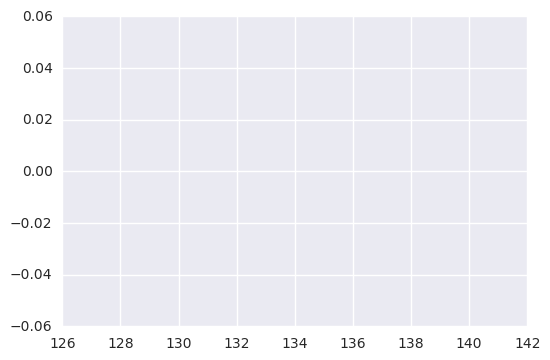

In [138]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


**Bonus 2** : Create another, more complex hypothesis, support it, and plot it below. 